In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catch22 import catch22_all
import scipy.ndimage as ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable

In [15]:
f=pd.read_csv(r'C:\Users\Firefly\Desktop\Projection\fb_standard_with_type.csv')
f=f.iloc[:,1:]
f

,Type,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,3,0.513196,0.699381,0.502991,0.472050,0.306299,0.628491,0.480746,0.510957,0.558144,...,0.581388,0.666353,0.600837,0.726488,0.607646,0.686063,0.926393,0.489250,0.501252,0.533085
1,3,0.271377,0.294033,0.724271,0.867073,0.514059,0.546456,0.315758,0.536838,0.378515,...,0.534654,0.748042,0.742753,0.832756,0.470122,0.611089,0.969176,0.601558,0.287222,0.388484
2,4,0.819428,0.790227,0.708368,0.098257,0.528142,0.545822,0.672943,0.538649,0.638524,...,0.377190,0.546665,0.300451,0.016927,0.470122,0.645579,0.000000,0.420243,0.369928,0.657949
3,4,0.767777,0.701654,0.888736,0.098257,0.494317,0.636621,0.729761,0.556497,0.580751,...,0.366423,0.544540,0.278157,0.022477,0.499367,0.707115,0.000000,0.000000,0.333445,0.702655
4,0,0.694671,0.906081,0.852272,0.837594,0.723937,0.513589,0.305726,0.746276,0.525721,...,0.459242,0.532817,0.295671,0.760189,0.555056,0.435138,0.531297,0.601558,0.257768,0.358724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,3,0.459745,0.552238,0.569316,0.428110,0.672919,0.544687,0.483767,0.589215,0.375069,...,0.527508,0.476938,0.372299,0.690431,0.555056,0.422057,0.952693,0.641309,0.472311,0.506423
424,3,0.789026,0.686649,0.624264,0.367783,0.426150,0.681155,0.646359,0.419527,0.597939,...,0.512658,0.519857,0.485150,0.676246,0.408141,0.594794,0.977136,0.641309,0.461831,0.615536
425,1,0.836248,0.797812,0.562957,0.623894,0.556854,0.620343,0.573367,0.549413,0.685050,...,0.482963,0.652992,0.468236,0.632336,0.408141,0.553453,0.487273,0.682204,0.439322,0.566834
426,1,0.623214,0.441429,0.452233,0.537996,0.621990,0.580518,0.529913,0.423918,0.497195,...,0.420696,0.742976,0.489268,0.612816,0.751668,0.522776,0.531297,0.903632,0.543126,0.549134


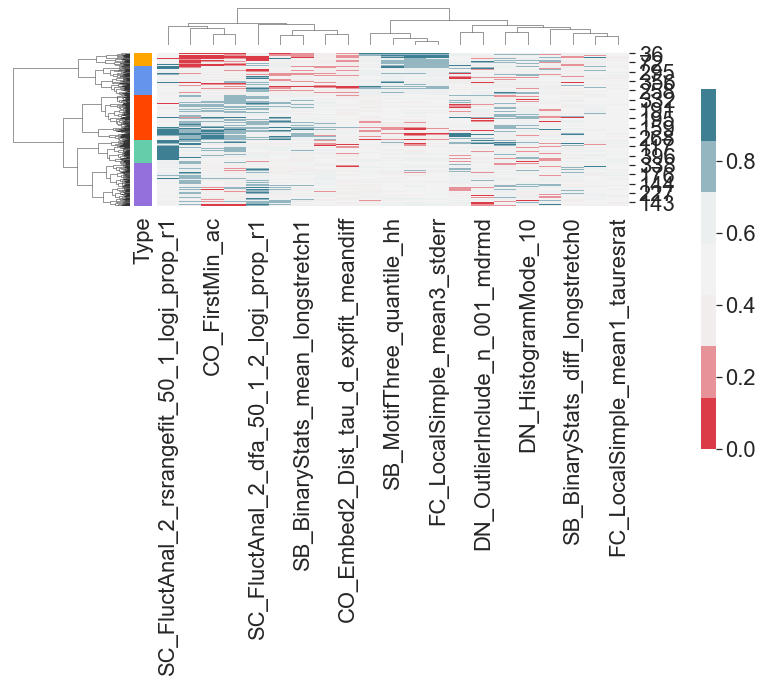

In [16]:

row_c = dict(zip(f['Type'].unique(), ['mediumaquamarine','orange','orangered','mediumpurple','cornflowerblue']))
sns.clustermap(data=f.iloc[:,1:],
               method='ward',
               row_colors=f['Type'].map(row_c), 
               
               cbar_kws={
                           'orientation': 'vertical',#color bar的方向设置，默认为'vertical'，可水平显示'horizontal'
                           "ticks":np.arange(0,1,0.2),#color bar中刻度值范围和间隔
                           "format":"%.1f",#格式化输出color bar中刻度值
                           #"pad":0.2,#color bar与热图之间距离，距离变大热图会被压缩
                           'shrink':1 },
                   
                cbar_pos=(1, 0.35, 0.02, 0.5), #(left, bottom, width, height)
                cmap=sns.diverging_palette(10, 220, sep=80, n=7)
              )

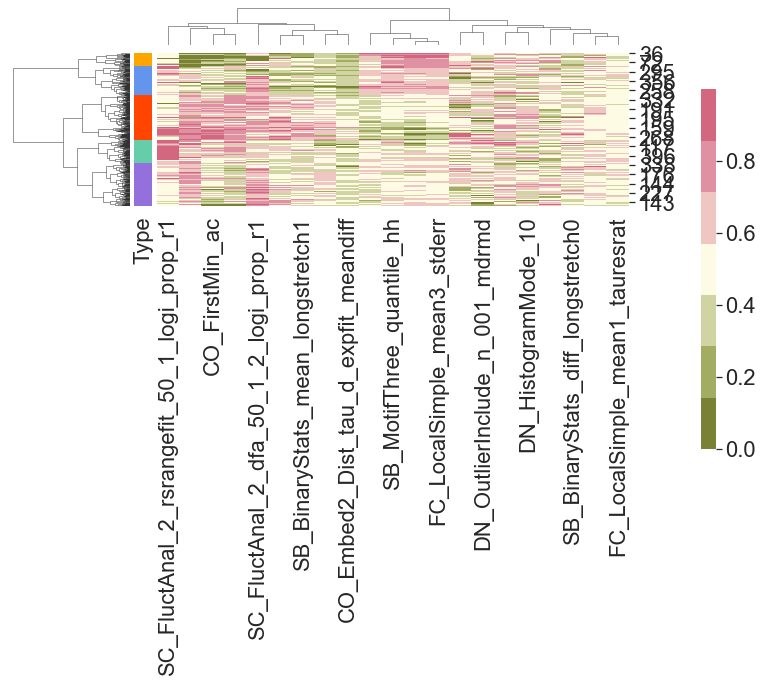

In [17]:
row_c = dict(zip(f['Type'].unique(), ['mediumaquamarine','orange','orangered','mediumpurple','cornflowerblue']))
sns.clustermap(data=f.iloc[:,1:],
               method='ward',
               row_colors=f['Type'].map(row_c), 
               
               cbar_kws={
                           'orientation': 'vertical',
                           "ticks":np.arange(0,1,0.2),#color bar中刻度值范围和间隔
                           "format":"%.1f",#格式化输出color bar中刻度值
                           
                           'shrink':1 },
                   
                cbar_pos=(1, 0.35, 0.02, 0.5), #(left, bottom, width, height)
                cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors
              )

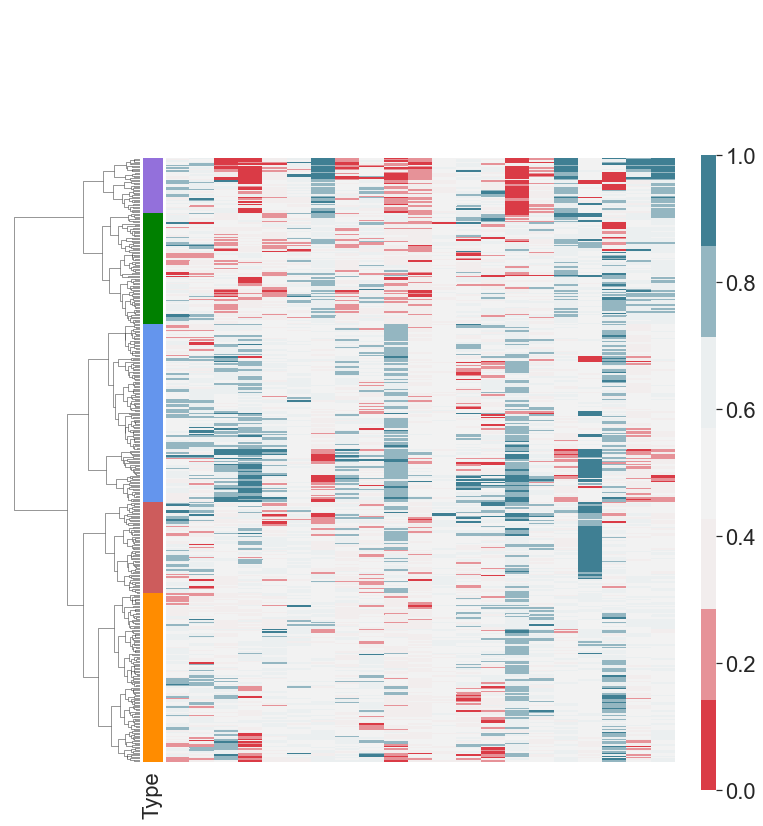

In [21]:
#row_c = dict(zip(f['Type'].unique(), ['mediumaquamarine','orange','orangered','mediumpurple','cornflowerblue']))
row_c = dict(zip(f['Type'].unique(), ['indianred','mediumpurple','cornflowerblue','darkorange','green']))
sns.set(font_scale=2)
g=sns.clustermap(figsize=(10,12),
               data=f.iloc[:,1:],
               method='ward',
               row_colors=f['Type'].map(row_c), 
               col_cluster=False,
               yticklabels=False,
               xticklabels=False,
               cbar_kws={
                           'orientation': 'vertical',
                           "ticks":np.arange(0,1.2,0.2),#color bar中刻度值范围和间隔
                           "format":"%.1f",#格式化输出color bar中刻度值
                           
                           'shrink':1 },
                   
                cbar_pos=(1, 0.063, 0.02, 0.735), #(left, bottom, width, height)
                cmap=sns.diverging_palette(10, 220, sep=80, n=7),
                
              )
labels=['Waving','Noisy','Blinking-S','Blinking-L','Quiet']
for label in f['Type'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=row_c[label],
                            label=labels[label], linewidth=0)
#g.ax_col_dendrogram.legend(loc="lower center", ncol=5,fontsize=24,frameon=False)
#plt.savefig('clustermap.eps',format='eps',dpi=1200)
#plt.savefig('clustermap.png',dpi=1200)